In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\patricio\Documents\bf-dssgx\data\observations_humans_via_camera_sensors_on_trails.csv")

### Complete count of detection

In [3]:
df.index = pd.to_datetime(df.date_recorded_local)

In [4]:
import pandas as pd
import plotly.express as px


# Convert the datetime column to a datetime object
df['date_recorded_local'] = pd.to_datetime(df['date_recorded_local'])

# Resample the data (adjust the rule as needed)
df_resampled = df.resample('1D', on='date_recorded_local').size().to_frame(name='count')

# Create a Plotly figure
fig = px.line(df_resampled, x=df_resampled.index, y='count', title='Count over Time (Sum of all cameras)')
fig.show()

### Count of Activities detected

In [5]:
# Count the occurrences of each category
category_counts = df['Human_category'].value_counts()

# Create a Plotly bar chart
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
            labels={'x': 'Activity', 'y': 'Count'}, title='Count of Activities')
fig.show()


### Visualize daily count for each camera tocheck different uses along the year

To change to monthly just edit the resample  to ("ME")

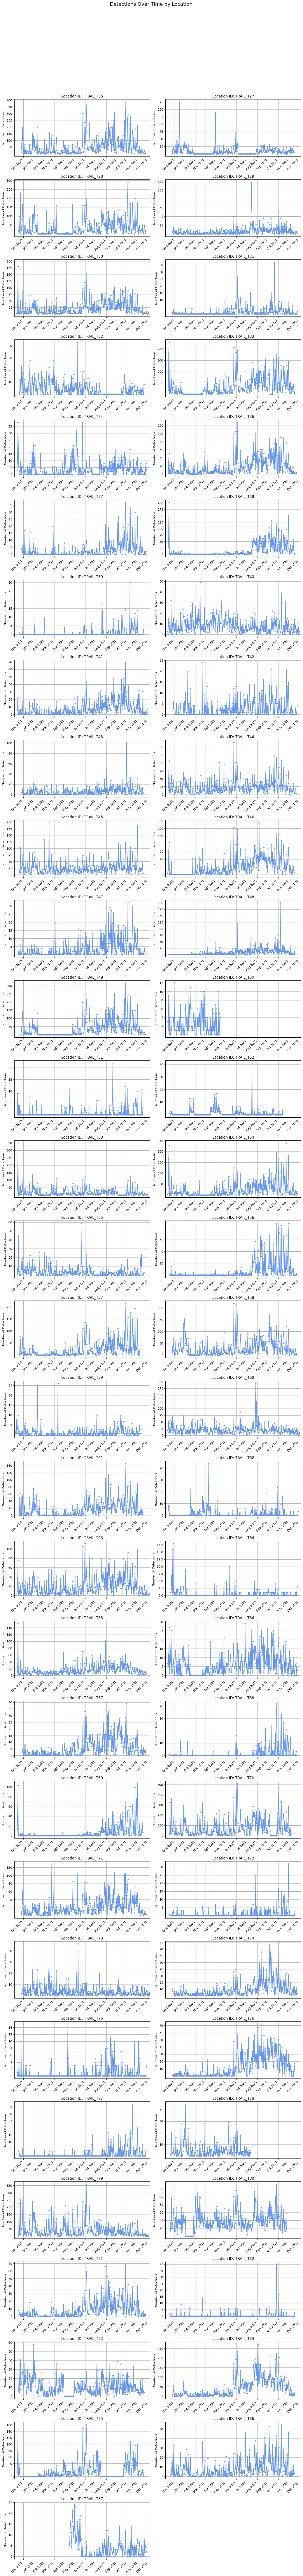

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.dates as mdates

# Example DataFrame setup (replace this with your actual data)
# df = pd.read_csv('your_data.csv', parse_dates=True, index_col='datetime_column')

# Get the unique location_ids
locations = df['location_id'].unique()

# Determine the number of rows needed (2 columns layout)
num_locations = len(locations)
num_rows = math.ceil(num_locations / 2)

# Create a figure and axes with 2 columns and as many rows as needed
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, num_rows * 4), sharex=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Determine the common x-axis limits
start_date = df.index.min()
end_date = df.index.max()

# Loop over each location and plot its data in the corresponding subplot
for i, location in enumerate(locations):
    # Filter data for the current location
    location_data = df[df['location_id'] == location]
    
    # Resample and count detections by month
    resampled_data = location_data.resample('D').size()
    
    # Plot the data on the i-th subplot
    axes[i].plot(resampled_data.index, resampled_data.values, marker='o', linestyle='-', color='cornflowerblue', markersize=3)
    

    
    # Set plot titles and labels
    axes[i].set_title(f'Location ID: {location}')
    axes[i].set_ylabel('Number of Detections')
    axes[i].grid(True)
    
    # Set fixed x-axis limits and format the x-axis to show month names
    axes[i].set_xlim(start_date, end_date)
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())

    # Rotate x-axis labels for better readability
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha="right")

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Set common title
fig.suptitle('Detections Over Time by Location', fontsize=16, va="top")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Total count over the year for each location to incorporate to QGIS

In [10]:
import geopandas as gpd

#group entries for each location and add a column for total count of visitors

result = df.groupby('location_id').agg(
    X=('X', 'first'),  
    Y=('Y', 'first'),  
    count=('location_id', 'size')
).reset_index()

#transform into a geopandas df to then save it as shp file to quickly open it on QGIS
gdf = gpd.GeoDataFrame(result, geometry=gpd.points_from_xy(result.X, result.Y))

gdf.set_crs(epsg=4326, inplace=True)

gdf.to_file(r"C:\Users\patricio\Documents\bf-dssgx\outputs\geodata_camera_sensors.shp")

# The result was manually incorporated to "all_geodata_bf.qgz" and uploaded to data folder on drive


C:\Users\patricio\AppData\Local\Temp\ipykernel_3700\1811683925.py:16: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

c:\Users\patricio\.pyenv-win-venv\envs\bf_dssdgx\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning:

Normalized/laundered field name: 'location_id' to 'location_i'

